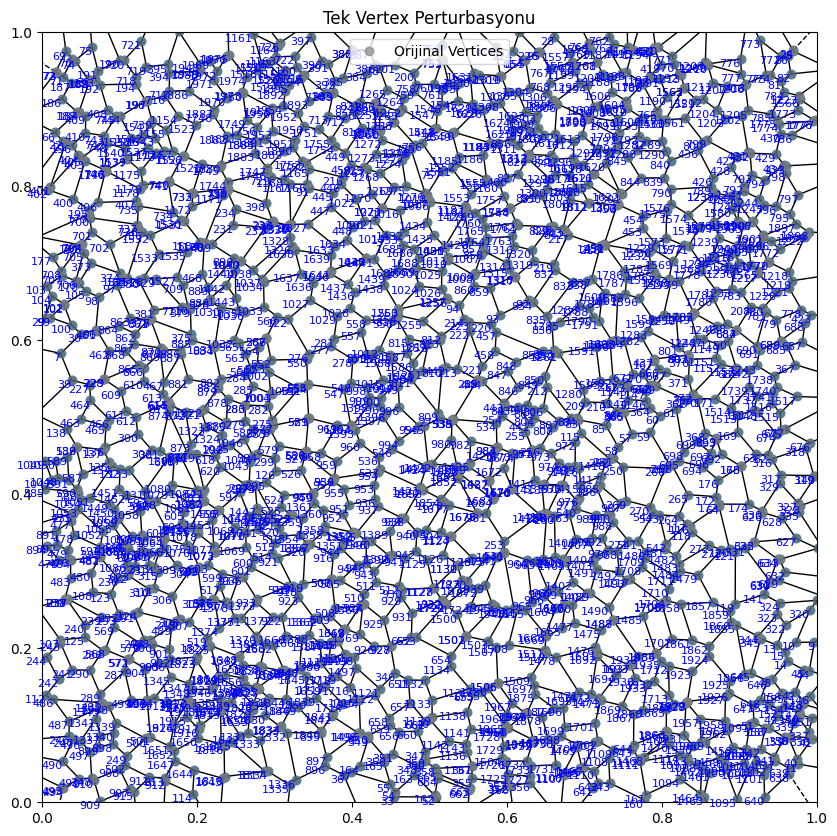

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# ---------------------------------------------------------------
# 1. Voronoi diyagramı oluştur
# ---------------------------------------------------------------
np.random.seed(0)
# 0- 40 arası rastgele 2D nokta
points = np.random.rand(1000, 2)
# points = np.random.rand(1000, 2) 
vor = Voronoi(points)

# ---------------------------------------------------------------
# 2. Bir vertex seç ve perturb et
# ---------------------------------------------------------------
# vertex_index = 809                  # perturb edilecek vertex indeksi
# delta = np.array([0.005, 0.005])  # perturbasyon vektörü
# perturbed_vertices = vor.vertices.copy()
# perturbed_vertices[vertex_index] += delta

# ---------------------------------------------------------------
# 3. Çizim
# ---------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))

# Voronoi kenarları
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True,)

# Orijinal vertex’ler (gri)
ax.plot(vor.vertices[:, 0], vor.vertices[:, 1], 'o', color='gray', label='Orijinal Vertices', alpha=0.6)

# Perturb edilmiş vertex (sarı kare)
# ax.plot(perturbed_vertices[vertex_index, 0], perturbed_vertices[vertex_index, 1],
#         'ys', markersize=10, label='Perturb Edilmiş Vertex')

# # Perturbasyon yönünü gösteren ok
# ax.arrow(vor.vertices[vertex_index, 0],
#          vor.vertices[vertex_index, 1],
#          delta[0], delta[1],
#          head_width=0.015, color='orange', length_includes_head=True)

# Orijinal vertex (kırmızı daire)
# ax.plot(vor.vertices[vertex_index, 0], vor.vertices[vertex_index, 1],
#         'ro', markersize=6, label='Orijinal Vertex')

# Nokta (seed) konumları
# ax.plot(points[:, 0], points[:, 1], 'b.', label='Seeds')

# Plot the index of vertices
# for i, (x, y) in enumerate(vor.vertices):
#         ax.text(x, y, str(i), color='black',ha='right', va='bottom')

# plot the index of points whose coordinates are between 0 and 40
for i, (x, y) in enumerate(vor.vertices):
    if 0 < x < 1 and 0 < y < 1:
        ax.text(x, y, str(i), color='blue', fontsize=8, ha='right', va='top')

ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
# ax.set_aspect('equal')
ax.set_title("Tek Vertex Perturbasyonu")

# save the figure
plt.savefig('single_vertex_perturbation.png', dpi=600, bbox_inches=None)

# plt.tight_layout()
plt.show()


In [134]:
# find the index of a vertex closest to 20,20
distances_to_center = np.linalg.norm(vor.vertices - np.array([0.5, 0.5]), axis=1)
closest_vertex_index = np.argmin(distances_to_center)
print('closest_vertex_index :', closest_vertex_index)

closest_vertex_index : 809


In [135]:
perturbed_vertex_index = closest_vertex_index
delta = np.array([0.001, 0])

In [136]:
from Main_Function_perturbation import fun_vor_main_perturbation
explicit_voronoi_perturbed, vertices_perturbed, cell_centers_perturbed, distance_original_list_perturbed, distance_from_found_to_previous_perturbed = fun_vor_main_perturbation(vor, points,perturbed_vertex_index,delta)

from Main_Function import fun_vor_main
explicit_voronoi, vertices, cell_centers, distance_original_list, distance_from_found_to_previous = fun_vor_main(vor, points)



            Converged after 140 iterations
            Converged after 140 iterations


In [137]:
for keys in explicit_voronoi.keys():
    print(explicit_voronoi[keys])

{'seed number': 0, 'seed coordinates': [0.5488135039273248, 0.7151893663724195], 'neighbors': [251, 268, 682, 761, 770, 785, 952], 'edges': [[1005, 1430], [858, 1007], [1428, 1430], [857, 1428], [1011, 1005], [857, 858], [1011, 1007]], 'cell vertices': [1005, 1007, 1011, 1428, 1430, 857, 858]}
{'seed number': 1, 'seed coordinates': [0.6027633760716439, 0.5448831829968969], 'neighbors': [53, 549, 623, 885], 'edges': [[444, 847], [846, 847], [443, 444], [443, 846]], 'cell vertices': [443, 444, 846, 847]}
{'seed number': 2, 'seed coordinates': [0.4236547993389047, 0.6458941130666561], 'neighbors': [62, 144, 189, 640, 674, 717, 745, 923, 928], 'edges': [[556, 558], [1253, 1254], [816, 556], [560, 1438], [1436, 1438], [560, 1253], [1436, 1028], [816, 1254], [1028, 558]], 'cell vertices': [1028, 1253, 1254, 556, 558, 816, 560, 1436, 1438]}
{'seed number': 3, 'seed coordinates': [0.4375872112626925, 0.8917730007820798], 'neighbors': [71, 330, 736, 933], 'edges': [[1259, 1261], [1260, 1261], [

In [138]:
# find the distances of points between cell_centers and cell_centers_perturbed
distances_between_centers = np.sqrt(np.sum((cell_centers - cell_centers_perturbed)**2, axis=1))
print('distances_between_centers :', distances_between_centers)

# find centers which are affected more than 1e-5
affected_centers_indices = np.where(distances_between_centers > 10e-5)[0]
print('affected_centers_indices :', affected_centers_indices)

# RMS error of each cell center
RMS_distance = np.sqrt(np.mean(np.sum((cell_centers - points)**2, axis=1)))
# log10 the RMS distance
log10_RMS_distance = np.log10(RMS_distance)
print('log10_RMS_distance :', log10_RMS_distance)

# Perturbed RMS error of each cell center
RMS_distance_perturbed = np.sqrt(np.mean(np.sum((cell_centers_perturbed - points)**2, axis=1)))
# log10 the RMS distance
log10_RMS_distance_perturbed = np.log10(RMS_distance_perturbed)
print('log10_RMS_distance perturbed:', log10_RMS_distance_perturbed)

percentage_affected = (len(affected_centers_indices) / len(cell_centers)) * 100
print('percentage_affected :', percentage_affected)

distances_between_centers : [8.09553900e-07 5.50504975e-05 6.21955348e-06 5.25247445e-10
 7.07751428e-11 3.47836659e-09 8.85314039e-10 2.46826481e-13
 1.62393240e-12 6.53920923e-11 5.40625687e-13 2.31961393e-08
 7.93115737e-10 5.43265565e-13 1.04593075e-05 4.31264483e-10
 1.97894130e-04 2.73689047e-11 6.02593937e-06 1.36974467e-11
 6.77236724e-06 7.54776554e-11 2.37312632e-06 1.50974031e-12
 1.50050181e-07 4.26477863e-05 2.36477350e-13 1.36461106e-11
 4.75694372e-07 1.93808241e-08 3.33814454e-13 8.14167791e-09
 3.60551485e-09 7.38374243e-11 1.95374858e-11 2.02600947e-11
 3.51619215e-12 3.80770740e-11 2.06309153e-12 1.28263840e-11
 9.51701404e-07 1.44209363e-10 2.71386200e-07 5.41066112e-09
 2.07426662e-10 2.83465515e-07 1.96961250e-10 2.68434280e-10
 3.88603517e-10 4.38065044e-12 5.27383161e-08 2.91464125e-12
 8.11847747e-08 9.55517433e-05 3.63037574e-13 2.00254420e-09
 6.69353067e-08 1.48429571e-08 3.50626420e-10 3.13771655e-10
 1.41428115e-06 1.23833144e-11 5.81958858e-06 4.26288938e

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from scipy.spatial import voronoi_plot_2d

# ---------------------------------------------------------------
# Create a custom "white-to-inferno" colormap
# ---------------------------------------------------------------
base_cmap = plt.cm.inferno
colors = base_cmap(np.linspace(0, 1, 256))
colors[0] = [1, 1, 1, 1]  # replace lowest value with white (RGBA)
white_inferno = LinearSegmentedColormap.from_list('white_inferno', colors)

# ---------------------------------------------------------------
# Plot setup
# ---------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))

# Draw Voronoi edges
voronoi_plot_2d(
    vor, ax=ax, show_points=False, show_vertices=False,
    line_colors='black', line_width=0.3, line_alpha=0.5
)

# ---------------------------------------------------------------
# Build colored polygons
# ---------------------------------------------------------------
patches = []
values = []

for i, region_index in enumerate(vor.point_region):
    region = vor.regions[region_index]
    if -1 in region or len(region) == 0:
        continue
    polygon = np.array([vor.vertices[j] for j in region])
    patches.append(Polygon(polygon, closed=True))
    values.append(distances_between_centers[i])

# ---------------------------------------------------------------
# Add patch collection with white-inferno colormap
# ---------------------------------------------------------------
collection = PatchCollection(
    patches,
    cmap=white_inferno,
    norm=LogNorm(vmin=1e-5, vmax=0.001),
    edgecolor='black',
    linewidth=0.2
)
collection.set_array(np.array(values))
ax.add_collection(collection)

# ---------------------------------------------------------------
# Colorbar
# ---------------------------------------------------------------
cbar = plt.colorbar(collection, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label('Restored Cell Accuracy Error', fontsize=11)
cbar.ax.tick_params(labelsize=9)

# ---------------------------------------------------------------
# Highlight perturbed vertex
# ---------------------------------------------------------------
# ax.plot(
#     perturbed_vertices[perturbed_vertex_index, 0],
#     perturbed_vertices[perturbed_vertex_index, 1],
#     marker='*', color='red', markersize=4,
#     label='Perturbed Vertex', zorder=5
# )

# ---------------------------------------------------------------
# Styling for academic paper
# ---------------------------------------------------------------
ax.set_facecolor('white')
ax.set_xlim(vor.min_bound[0], vor.max_bound[0])
ax.set_ylim(vor.min_bound[1], vor.max_bound[1])
ax.set_aspect('equal')
ax.tick_params(labelsize=9)
ax.legend(loc='upper right', fontsize=9, frameon=True, framealpha=0.9)
ax.set_xlabel('x-coordinate', fontsize=10)
ax.set_ylabel('y-coordinate', fontsize=10)
# ax.set_title('Effect of Vertex Perturbation on Restored Cell Accuracy', fontsize=11)

main_title = 'Effect of Vertex Perturbation on Restored Cell Accuracy'
fig.text(0.5, 0.95, main_title, fontsize=11, ha='center', va='top')

# log10_RMS_distance = -14.533680447438837
# log10_RMS_distance_perturbed = -4.247836508213576
# percentage_affected = 16.0

subtitle = (
    f"log₁₀ RMS distance (unperturbed): {log10_RMS_distance:.3f}   |   "
    f"log₁₀ RMS distance (perturbed): {log10_RMS_distance_perturbed:.3f}   |   "
    f"Affected cells: {percentage_affected:.1f}%"
)

# Place subtitle directly BELOW main title
fig.text(
    0.5, 0.91, subtitle,
    ha='center', va='top',
    fontsize=9, color='black'
)


ax.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', markersize=10, label='Cell Centers', alpha=0.6)
ax.plot(cell_centers_perturbed[:, 0], cell_centers_perturbed[:, 1], 'g+', markersize=10, label='Perturbed Cell Centers', alpha=0.6)

# generate a voronoi plot from perturbed cell centers
vor_perturbed = Voronoi(cell_centers_perturbed)
voronoi_plot_2d(
    vor_perturbed, ax=ax, show_points=False, show_vertices=False,
    line_colors='blue', line_width=0.3, line_alpha=1
)

#plot index of cell centers
for i, (x, y) in enumerate(cell_centers):
        ax.text(x, y, str(i), color='black',ha='right', va='bottom', fontsize=8)

#plot the index of vertices
for i, (x, y) in enumerate(vor.vertices):
    if 0 < x < 1 and 0 < y < 1:
        ax.text(x, y, str(i), color='blue', fontsize=8, ha='right', va='top')


# plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("Voronoi_Perturbation.png", dpi=600, bbox_inches='tight')
plt.show()

# save figure


C:\Users\user\AppData\Local\Temp\ipykernel_28832\1381736721.py:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize=9, frameon=True, framealpha=0.9)


In [140]:
from mirror import mirror_point
mirrored_neighbors = {}
for key in explicit_voronoi.keys():
    print(explicit_voronoi[key])
    # neighbors
    neighbors = explicit_voronoi[key]['neighbors']
    print('neighbors :', neighbors)
    seed_number = explicit_voronoi[key]['seed number']
    mirrored_points = []
    for n in neighbors:
        # find the common edge between key and n
        edges_of_the_cell = explicit_voronoi[key]['edges']
        edges_of_the_neighbor = explicit_voronoi[f'sub_dict_{n}']['edges']
        common_edges = [edge for edge in edges_of_the_cell if edge in edges_of_the_neighbor]
        print(f'common_edges between {key} and {n} :', common_edges)
        # mirror the found center of n to the other side of the common edge
        seed_coordinate_of_neighbor = cell_centers[n]
        common_vertex1_coord = vertices[common_edges[0][0]]
        common_vertex2_coord = vertices[common_edges[0][1]]
        mirror_seed = mirror_point(seed_coordinate_of_neighbor, common_vertex1_coord, common_vertex2_coord)
        mirrored_points.append(mirror_seed)
    mirrored_neighbors[f'cell_{seed_number}'] = np.array(mirrored_points)

for key in mirrored_neighbors.keys():
    print(key, mirrored_neighbors[key])

# distance of mirrored points to cell center
mirrored_distances = {}
for key in mirrored_neighbors.keys():
    cell_index = int(key.split('_')[1])
    cell_center = cell_centers[cell_index]
    mirrored_points = mirrored_neighbors[key]
    distances = np.linalg.norm(mirrored_points - cell_center, axis=1)
    mirrored_distances[key] = distances

print('mirrored_distances :', mirrored_distances)

average_mirrored_distances = {}
for key in mirrored_distances.keys():
    avg_distance = np.mean(mirrored_distances[key])
    average_mirrored_distances[key] = avg_distance

print('average_mirrored_distances :', average_mirrored_distances)

{'seed number': 0, 'seed coordinates': [0.5488135039273248, 0.7151893663724195], 'neighbors': [251, 268, 682, 761, 770, 785, 952], 'edges': [[1005, 1430], [858, 1007], [1428, 1430], [857, 1428], [1011, 1005], [857, 858], [1011, 1007]], 'cell vertices': [1005, 1007, 1011, 1428, 1430, 857, 858]}
neighbors : [251, 268, 682, 761, 770, 785, 952]
common_edges between sub_dict_0 and 251 : [[1005, 1430]]
common_edges between sub_dict_0 and 268 : [[858, 1007]]
common_edges between sub_dict_0 and 682 : [[1428, 1430]]
common_edges between sub_dict_0 and 761 : [[857, 1428]]
common_edges between sub_dict_0 and 770 : [[1011, 1005]]
common_edges between sub_dict_0 and 785 : [[857, 858]]
common_edges between sub_dict_0 and 952 : [[1011, 1007]]
{'seed number': 1, 'seed coordinates': [0.6027633760716439, 0.5448831829968969], 'neighbors': [53, 549, 623, 885], 'edges': [[444, 847], [846, 847], [443, 444], [443, 846]], 'cell vertices': [443, 444, 846, 847]}
neighbors : [53, 549, 623, 885]
common_edges betw

In [141]:
from mirror import mirror_point
mirrored_neighbors = {}
for key in explicit_voronoi_perturbed.keys():
    print(explicit_voronoi_perturbed[key])
    # neighbors
    neighbors = explicit_voronoi_perturbed[key]['neighbors']
    print('neighbors :', neighbors)
    seed_number = explicit_voronoi_perturbed[key]['seed number']
    mirrored_points = []
    for n in neighbors:
        # find the common edge between key and n
        edges_of_the_cell = explicit_voronoi_perturbed[key]['edges']
        edges_of_the_neighbor = explicit_voronoi_perturbed[f'sub_dict_{n}']['edges']
        common_edges = [edge for edge in edges_of_the_cell if edge in edges_of_the_neighbor]
        print(f'common_edges between {key} and {n} :', common_edges)
        # mirror the found center of n to the other side of the common edge
        seed_coordinate_of_neighbor = cell_centers[n]
        common_vertex1_coord = vertices[common_edges[0][0]]
        common_vertex2_coord = vertices[common_edges[0][1]]
        mirror_seed = mirror_point(seed_coordinate_of_neighbor, common_vertex1_coord, common_vertex2_coord)
        mirrored_points.append([n,mirror_seed])
    mirrored_neighbors[f'cell_{seed_number}'] = mirrored_points

for key in mirrored_neighbors.keys():
    print(key, mirrored_neighbors[key])

# # distance of mirrored points to cell center
nonvoronoiness = {}
for key in mirrored_neighbors.keys():
    cell_index = int(key.split('_')[1])
    cell_center_perturbed = cell_centers_perturbed[cell_index]
    normalized_mirrored_distances = []
    for n, mirrored_point in mirrored_neighbors[key]:
        distance_to_center = np.linalg.norm(mirrored_point - cell_center_perturbed)
        distance_to_neighbor_seed = np.linalg.norm(mirrored_point - points[n])
        normalized_distance = distance_to_center / distance_to_neighbor_seed 
        normalized_mirrored_distances.append(normalized_distance)
    avg_normalized_distance = np.mean(normalized_mirrored_distances)
    nonvoronoiness[key] = avg_normalized_distance
print('nonvoronoiness :', nonvoronoiness)

{'seed number': 0, 'seed coordinates': [0.5488135039273248, 0.7151893663724195], 'neighbors': [251, 268, 682, 761, 770, 785, 952], 'edges': [[1005, 1430], [858, 1007], [1428, 1430], [857, 1428], [1011, 1005], [857, 858], [1011, 1007]], 'cell vertices': [1005, 1007, 1011, 1428, 1430, 857, 858]}
neighbors : [251, 268, 682, 761, 770, 785, 952]
common_edges between sub_dict_0 and 251 : [[1005, 1430]]
common_edges between sub_dict_0 and 268 : [[858, 1007]]
common_edges between sub_dict_0 and 682 : [[1428, 1430]]
common_edges between sub_dict_0 and 761 : [[857, 1428]]
common_edges between sub_dict_0 and 770 : [[1011, 1005]]
common_edges between sub_dict_0 and 785 : [[857, 858]]
common_edges between sub_dict_0 and 952 : [[1011, 1007]]
{'seed number': 1, 'seed coordinates': [0.6027633760716439, 0.5448831829968969], 'neighbors': [53, 549, 623, 885], 'edges': [[444, 847], [846, 847], [443, 444], [443, 846]], 'cell vertices': [443, 444, 846, 847]}
neighbors : [53, 549, 623, 885]
common_edges betw

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from matplotlib.colors import LogNorm
from scipy.spatial import Voronoi, voronoi_plot_2d

# ---------------------------------------------------------------
# Assume you already have:
#   vor = Voronoi(points)
#   nonvoronoiness = {'cell_0': ..., 'cell_1': ..., ...}
# ---------------------------------------------------------------

# ---------------------------------------------------------------
# Plot setup
# ---------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))

# Draw Voronoi edges (thin black lines)
voronoi_plot_2d(
    vor, ax=ax, show_points=False, show_vertices=False,
    line_colors='black', line_width=0.3, line_alpha=0.5
)

# ---------------------------------------------------------------
# Build colored polygons
# ---------------------------------------------------------------
patches = []
values = []

for i, region_index in enumerate(vor.point_region):
    region = vor.regions[region_index]
    if -1 in region or len(region) == 0:
        continue  # skip infinite regions

    polygon = np.array([vor.vertices[j] for j in region])
    patches.append(Polygon(polygon, closed=True))

    key = f'cell_{i}'
    val = nonvoronoiness.get(key, 1e-6)
    values.append(val)

# ---------------------------------------------------------------
# Add patch collection with perceptually uniform colormap
# ---------------------------------------------------------------
collection = PatchCollection(
    patches,
    cmap='plasma',                  # <--- clean & clear colormap
    norm=LogNorm(vmin=min(values), vmax=max(values)),
    edgecolor='black',
    linewidth=0.2
)
collection.set_array(np.array(values))
ax.add_collection(collection)

# ---------------------------------------------------------------
# Colorbar
# ---------------------------------------------------------------
cbar = plt.colorbar(collection, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label('Non-Voronoiness', fontsize=11)
cbar.ax.tick_params(labelsize=9)

# plot a star for the perturbed vertex
ax.plot(
    vor.vertices[perturbed_vertex_index, 0],
    vor.vertices[perturbed_vertex_index, 1],
    marker='*', color='red', markersize=10,
    label='Perturbed Vertex', zorder=5
)

# ---------------------------------------------------------------
# Styling for academic paper
# ---------------------------------------------------------------
ax.set_facecolor('white')
ax.set_xlim(vor.min_bound[0], vor.max_bound[0])
ax.set_ylim(vor.min_bound[1], vor.max_bound[1])
ax.set_aspect('equal')
ax.tick_params(labelsize=9)
ax.set_xlabel('x-coordinate', fontsize=10)
ax.set_ylabel('y-coordinate', fontsize=10)

main_title = 'Non-Voronoiness Distribution Across Cells'
fig.text(0.5, 0.95, main_title, fontsize=11, ha='center', va='top')

# Optional subtitle: show basic statistics
avg_val = np.mean(list(nonvoronoiness.values()))
max_val = np.max(list(nonvoronoiness.values()))
min_val = np.min(list(nonvoronoiness.values()))
subtitle = (
    f"Mean: {avg_val:.2e}   |   Min: {min_val:.2e}   |   Max: {max_val:.2e}"
)
fig.text(0.5, 0.91, subtitle, ha='center', va='top', fontsize=9, color='black')

# ---------------------------------------------------------------
# Annotate cell indices (optional)
# ---------------------------------------------------------------
for i, p in enumerate(vor.points):
    ax.text(p[0], p[1], str(i), color='black', ha='right', va='bottom', fontsize=8)

# ---------------------------------------------------------------
# Save & show
# ---------------------------------------------------------------
plt.savefig("Voronoi_NonVoronoiness_Plasma.png", dpi=600, bbox_inches='tight')
plt.show()
